In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical


In [2]:
pip install numpy pandas matplotlib opencv-python pillow scikit-learn keras tensorflow


Note: you may need to restart the kernel to use updated packages.


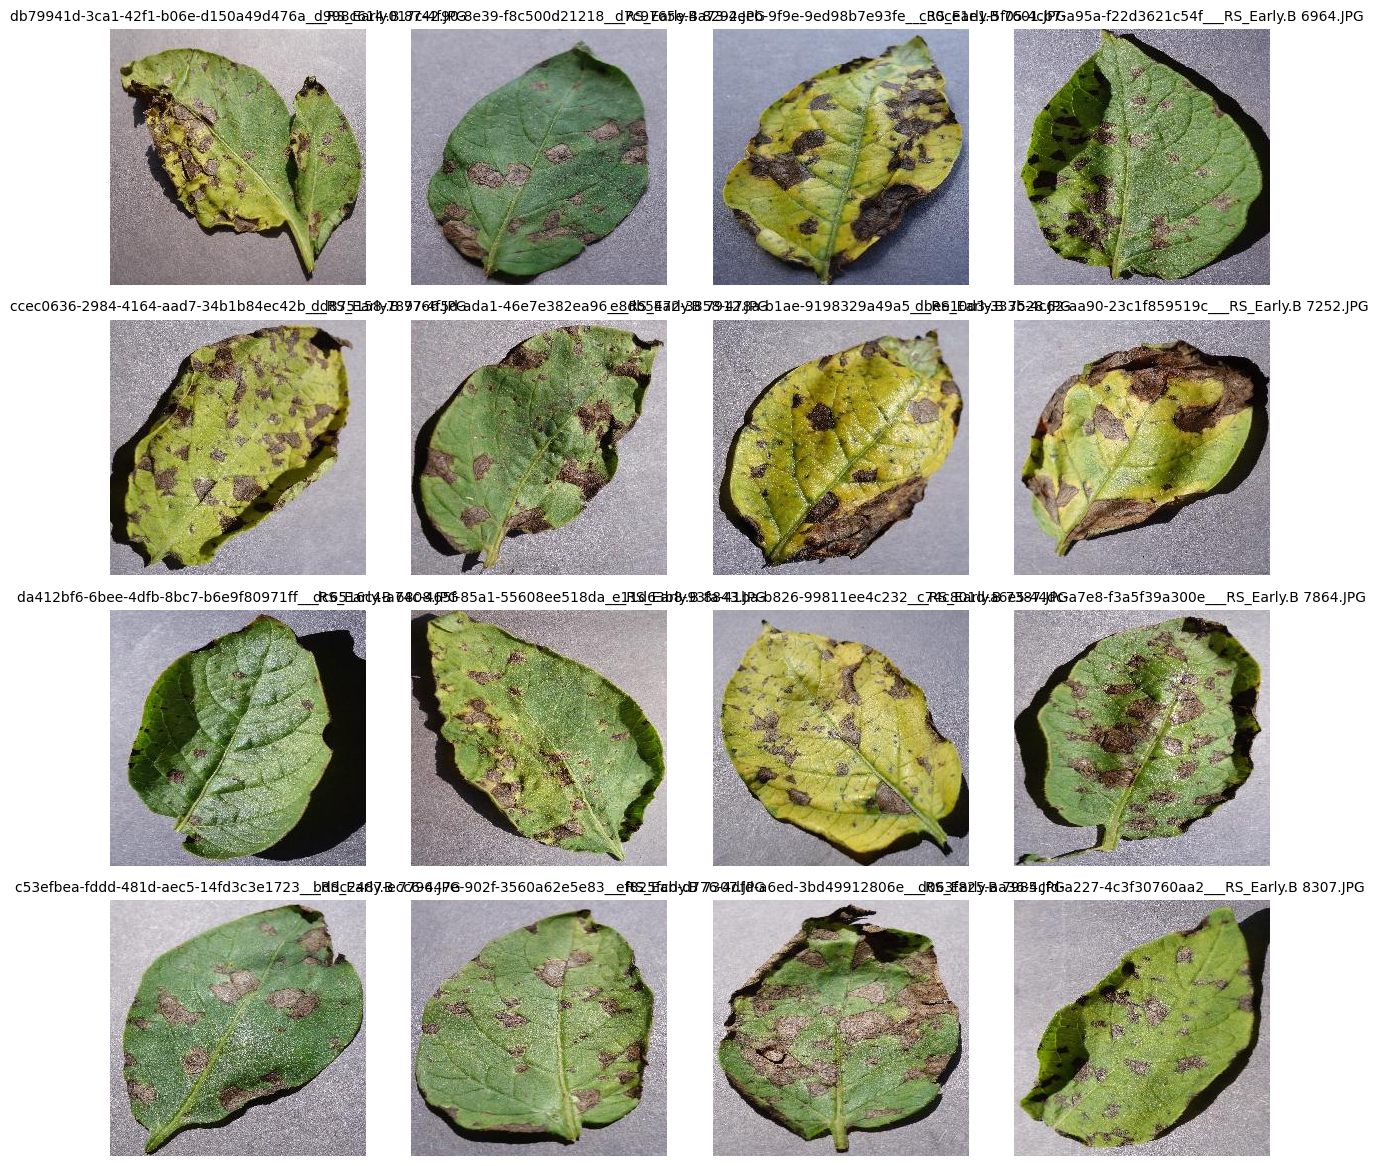

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import random

# Setting up the figure for plotting
plt.figure(figsize=(12, 12))

# Specify the path to your dataset
path = r"C:\Users\jayan\OneDrive\Documents\Leaf-disease-detection\archive (1)\Plant_images\Potato___Early_blight"

# Get the list of image files, filtering out non-image files
image_files = [f for f in os.listdir(path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Check if we found any image files
if not image_files:
    print("No image files found in the specified directory.")
else:
    # Loop to plot 16 random images
    for i in range(1, 17):
        plt.subplot(4, 4, i)
        plt.tight_layout()

        # Choose a random image file
        rand_img_file = random.choice(image_files)
        rand_img_path = os.path.join(path, rand_img_file)

        try:
            # Load and display the image
            rand_img = imread(rand_img_path)
            plt.imshow(rand_img)
            plt.axis('off')  # Turn off axis labels
            plt.title(f'{rand_img_file}', fontsize=10)  # Show filename as title
        except PermissionError:
            print(f"Permission denied for file: {rand_img_path}")

# Show the plot
plt.show()


In [4]:
#Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
print("done")

done


In [5]:
dir = r"C:\Users\jayan\OneDrive\Documents\Leaf-disease-detection\archive (1)\Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
#Now we will convert all the images into numpy array.

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])
print("done")

done


In [6]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

#it is a balanced dataset as you can see

0    300
1    300
2    300
Name: count, dtype: int64

In [7]:
#Next we will observe the shape of the image.
image_list[0].shape

(256, 256, 3)

In [8]:
#Checking the total number of the images which is the length of the labels list.
label_list = np.array(label_list)
label_list.shape

(900,)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [10]:
#Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

c:\Users\jayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Next we will split the dataset into validation and training data.
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [14]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    validation_data=(x_test, y_test))


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3200 - loss: 1.1886 - val_accuracy: 0.3278 - val_loss: 1.0520
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 894ms/step - accuracy: 0.3404 - loss: 0.9786 - val_accuracy: 0.3278 - val_loss: 0.9270
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 813ms/step - accuracy: 0.3413 - loss: 0.8981 - val_accuracy: 0.3278 - val_loss: 0.8168
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 833ms/step - accuracy: 0.3248 - loss: 0.7895 - val_accuracy: 0.3278 - val_loss: 0.7238
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 829ms/step - accuracy: 0.3421 - loss: 0.6849 - val_accuracy: 0.3278 - val_loss: 0.6491
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 798ms/step - accuracy: 0.3591 - loss: 0.6099 - val_accuracy: 0.6111 - val_loss: 0.5747
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 800ms/step - accuracy: 0.6419 - loss: 0.5511 - val_accuracy: 0.6111 - val_loss: 0.4939
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 821ms/step - accuracy: 0.7104 - loss: 0.4631 - val_accuracy: 0.9278 - val_loss: 0.

In [15]:
model.save(r'C:\Users\jayan\OneDrive\Documents\Leaf-disease-detection\my_model.h5')


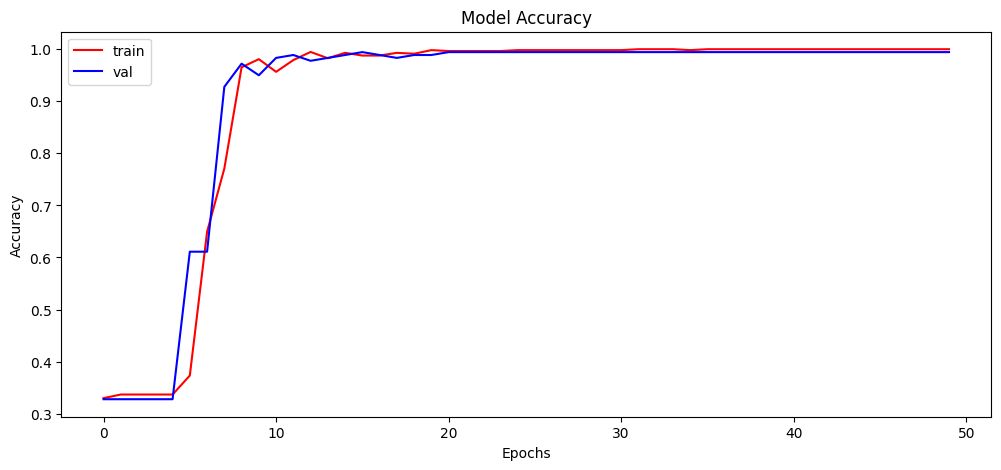

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [17]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9975 - loss: 0.0073 
Test Accuracy: 99.44444298744202


In [18]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


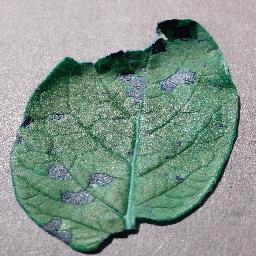

In [19]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [20]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


In [21]:
import os
print(os.getcwd())  # This will print the current working directory


c:\Users\jayan\OneDrive\Documents\Leaf-disease-detection
